# Switch Network Using Pymc3

 __With below network we tried to get idea or the approximation of the life cycle of switch and tried to get the idea of how
the different parameter is affecting the life cycle of switches.__





__ Why Pymc3__ <br>
Pymc3 is developed in python which support Bayesian statistic and probabilistic machine learning with advanced sampling method like Monte Carlo and Nuts sampling. As most the data scientist is moving towards python so it quite easy to understand and work on.The fabolus thing with Pymc3 is that it can fit and sample any model regardless of mathematical validation. Pymc3 can decide by itself which type of sampling method required as per the model and the distribution used in the network. but the only issue with Pymc3 is document is not clear enough for the beginner. .  <br>  



__ Why Not Pystan__  <br>
Pystan provides the interface to stan. It require python 3.5 or the higher version.Pystan has c++ compiler although pythan also used Bayesian statistics and probabilistic machine learning and have advanced sampling method HMM, MCMC and ADVI but the real issue is creating the model in pystan is not easy enough and sometime it cause juypter notebook to crash.Second issue is after creating the model we have to choose which sampling method we have to apply which require good understanding of how my distribution output should behave otherwise the result will be completely wrong.



__ Why Not Edward__  <br>

Although we can use use directly our Pymc3 and Pytsan model in Edward but the issue with the Edward is documentation is not clear at all and example which is given will confused you more  rather than giving you the hint.



# But why we need sampling at all if we know the statistic and mathematics approach to solve the problem

First of all the general idea of sampling is to draw every possible outcome of each node and relation between each node which is available in the network and give as approx expectations.<br> 

Now consider we have network which have 4 nodes and every node has 3 possible outcome so there is 3*3*3*3= 81 possible cases for which we need to calculate posterior probability based on different condition like inference which is time consuming and expensive and in the network where very high number of parameter is involved it will become more complicated. example electrical engines. <br>

The main objective of sampling is to calculate the normalize factor which is integral of likelihood and prior probability on different probability conditions example in 81 cases the normalize factor is 1 but when we apply the inference based on specific given condition probability distribution normalize factor will not be 1. so we have to again renormalized distribution which we have, depending on the condition and we have to do it multiple time based different conditions But thanks to sampling this things is taken care in different sampling methods <br>

 
__Disadvantage of sampling__

Its is slow because we need to draw lots of sample to get good approximation.






  
__Hint__<br>
As with statical modelling and probabilistic machine learning the biggest issue is creating the model which make sense not only mathematically also intuitively. but if we have statistical idea about the problem how to approach it with given data set the result will be more promising.

# Case Study To Understand Bayesian Hierarchical Model Using Pymc3

__To study the bayesian hierarchical model we will take a example of switiching model in electrical pumps__
 
 
 For our case study we will take simple network which include following parameters.
 1. Time 
 2. Temparture
 3. Wear
 4. Wear Before  

by using above parameter we will try to predict the life cycle of the switch.<br>

1. Here we get a Time from the user which tell us what is the duration of each switching operation.<br>
2. Temparture is depend on the time. example longer the duration of Time higher is the Temparture.<br>
3. Now if the Temparture is high it will contribute to the Wear Means higher the Temprature will result higher percentage of    Wear.<br>

below you can see the visulaization of the above network which is created using daft package and it will complete the first cycle of the switching operations.










In [1]:
# Importing the required packages
import pandas as pd
import numpy as np
import pymc3 as pm
import daft
import seaborn 
import matplotlib.pyplot as plt

C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


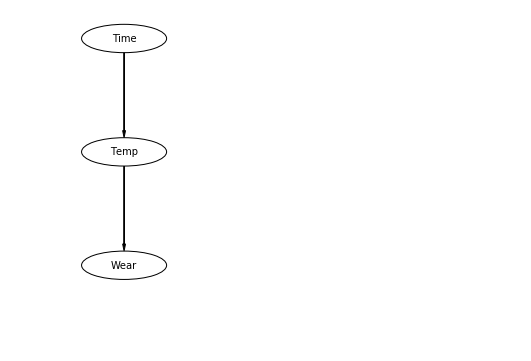

In [2]:
#First Iteration when system is started
pgm = daft.PGM([9,6],origin=[1, 0.5])
pgm.add_node(daft.Node('Time','Time',3,6,aspect=3))
pgm.add_node(daft.Node('Temp','Temp',3,4,aspect=3))
pgm.add_node(daft.Node('Wear','Wear',3,2,aspect=3))
pgm.add_edge('Time','Temp')
pgm.add_edge('Temp','Wear')
pgm.render();

__1. Now from the second switching operation whose Time we will get again from the user we alreadfy have some Wear in the system which is reponsible for Temprature increase <br>__

__2. And the Wear which is already in the system will contribute directly to wear which is going to happen in second switch      operation <br>__


   __As you can see below the visualization of the network from second switching operation till the number of operation user      perform or till the network fail.<br>__




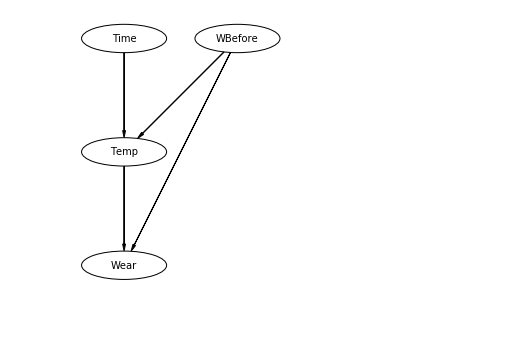

In [3]:
#from seconnd iteration  till system is down
pgm = daft.PGM([9,6],origin=[1, 0.5])
pgm.add_node(daft.Node('Time','Time',3,6,aspect=3))
pgm.add_node(daft.Node('WBefore','WBefore',5,6,aspect=3))
pgm.add_node(daft.Node('Temp','Temp',3,4,aspect=3))
pgm.add_node(daft.Node('Wear','Wear',3,2,aspect=3))
pgm.add_edge('Time','Temp')
pgm.add_edge('WBefore','Temp')
pgm.add_edge('WBefore','Wear')
pgm.add_edge('Temp','Wear')
pgm.render();

__Below is the example of data which we using in our network please note here we just using this file for Time of switching operation hence all the other column is not in use and reason is explained above.__ 

In [4]:
#Importing the file for Time  
df = pd.read_csv('C:/Users/DESUSAI/Desktop/New folder/Temp.csv',sep=';')
df

,Time,Temp,RunningTemp,Wear,Slot
0,1,200,200,16,1
1,1,100,166,13,2
2,1,100,166,12,3
3,1,200,166,20,4
4,1,100,166,15,5


# Wheather my data has any symmetry and why should i bother about it ?


Although it is not important at all that your data is symmetric or not . but doing the symmetric test will give you some idea about what kind of distribution we can use while creating the model which is very important for our  predictions.<br>

1. if skew is coming 0 then our  data is equally distributed towards positive and negative side. Which also mean That our       Mean is   same as our median.<br>
2. if skew is coming -ve  then our  data tailed towards negative side.Now we can say our Mean is smaller than our median.  <br>
3. if skew is coming +ve then it is  tailed towards positive side.which means  Mean is higher than median.<br>


__Is that really helpful to decide the which distribution should i use ?__

The answer is yes. Not exactly but it will give some hints which kind of distribution we should apply example  if our  data is skewed towards right then there is very less chances that our result will contain any -ve values which is quite helpful for deciding what kind of ditribution we should use. 

Below is the example of our data skewness.

In [5]:
df.skew()


Time           0.000000
Temp           0.608581
RunningTemp    2.236068
Wear           0.933451
Slot           0.000000
dtype: float64

__ Is plotting helpful to decide which distribution we should use  ?__

The answer is again yes. by plotting we can see the behaviour of our Data and can decide is it expontiallly rising or it normal distributed or something else . but unfortunately in our case we dont have suffcient amount of data and we did not have measurement of any other node also. all we have is the relation how one node is connected to another one. and what is the life cycle of switch..<br> 


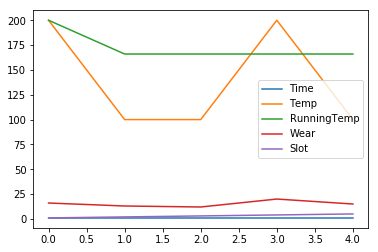

In [6]:
df.plot()
plt.show()

# Building the Network
__Now as per our assumption which we derived till now about the distribution we will create the network__

Now as with respect to Time our temperature can take any values so it is continuous for sure.


__But they are lots of categories in continuous which one we should choose ?__

Yes its a confusing but our expected measurement will give some hint.


__Why not Uniform Distribution__

  we can not guess the upper bound and lower bound for temperature so scope of applying Uniform Distribution not at all there.
  
__Why not Exponenetial Distribution as my Temparuture should increase based on Time and for other parameter also its look like will increase with Time__ 

 Reason is making sense but think again is our Time value is always rising ? The answer is no it may vary and based on Time our other parameter is also vary.
 


__Why only Normal Distribution why not Skew Normal which is available in Pymc3  ?__

  We cannot use Skew Normal here as we are not sure the result of each node and if we applying skew Normal than its like we telling our network that Mean is not 0 and we are not sure about it. As we are not sure about the dependentNode results wer are not using it.
  
  By seeing the above all the criteria Normal Distribution is making more sense here as we know result should be continuous and we can not predict upper bound and lower bound all we have the Mean of the dependent Node So applying Normal Distribution is seems more logical.   
  
  




As in function show we are saving result in dataFrames and printing the remaning life of the switch all user need to have is to put the life cycle of the switch first and number of switching operation with given Time which they have in file. 

In [7]:
def run_network(Maxlife,iterations):
    frames=[]
    loopWear = 0
    for i in range(0,iterations):    
        model = pm.Model();    
        with model:        
            Time = pm.Normal('Time',df.Time[i])
            Temp = pm.Normal('Temp',mu=Time+loopWear)
            wear = pm.Normal('wear',mu=Temp+loopWear)
            changedWear= pm.Normal('changedWear',mu=wear-loopWear)
            trace = pm.sample(10000,tune=5000,progressbar=True)    
            frames.append(pd.DataFrame({
                    "Wear": trace["wear"][5000:],
                    "temp": trace["Temp"][5000:],
                    "time": trace["Time"][5000:],
                    "WearChanged": trace["changedWear"][5000:]}))         
            
            loopWear =frames[i].Wear.mean()
            print(loopWear)
            print(df.Time[i],' sec',round(((Maxlife-loopWear)/Maxlife)*100),'% life is left')         
            
            
            plt.scatter(frames[i].temp,frames[i].time,color='orange')
            plt.xlabel('Temp')
            plt.ylabel('Time')
            plt.title('Time vs Temp')
            plt.show()
            plt.scatter(frames[i].Wear,frames[i].time,color='r')
            plt.title('Time vs Wear')
            plt.xlabel('Wear')
            plt.ylabel('Time')
            plt.show()
            plt.scatter(frames[i].WearChanged,frames[i].time,color='g')
            plt.title('Time vs Wear_Changed')
            plt.xlabel('Wear_Changed')
            plt.ylabel('Time')
            plt.show()     
    return frames
           
        
        
    


__Running the network and resulting Plot __

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|███████████████████████████████████| 15000/15000 [00:18<00:00, 828.73it/s]


1.021086681043683
1  sec 100 % life is left


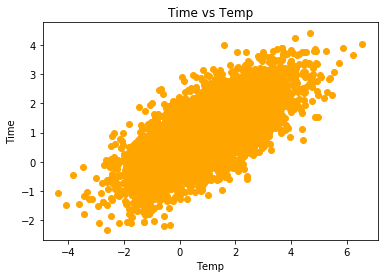

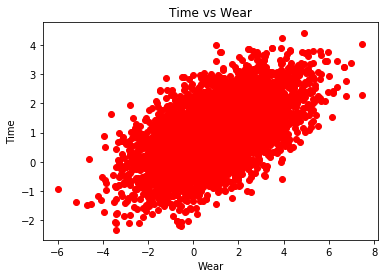

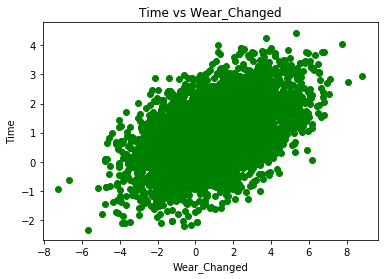

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|███████████████████████████████████| 15000/15000 [00:19<00:00, 784.92it/s]


3.026757803908698
1  sec 100 % life is left


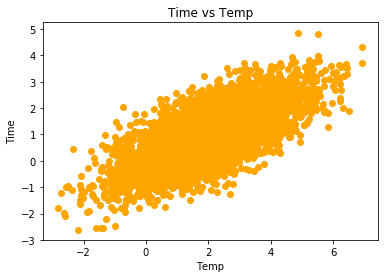

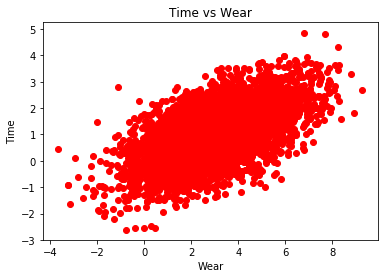

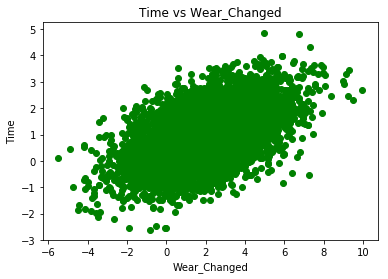

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|██████████████████████████████████▉| 14979/15000 [00:17<00:00, 839.53it/s]C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\step_methods\hmc\nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.6998089525563602, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|███████████████████████████████████| 15000/15000 [00:17<00:00, 839.49it/s]


7.08877008133303
1  sec 99 % life is left


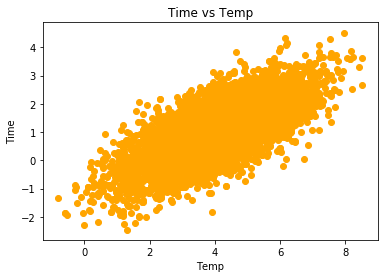

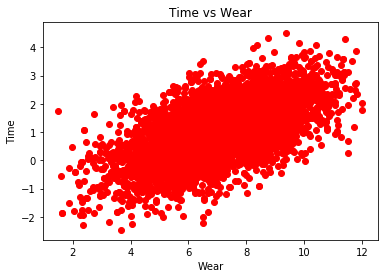

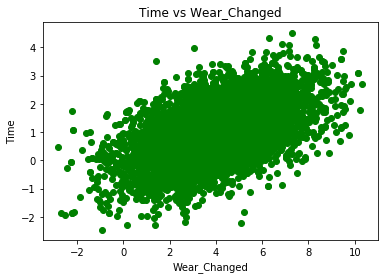

[          Wear  WearChanged      temp      time
 0     2.739926     1.559589  2.491288  2.784510
 1    -1.140183    -0.790156  0.265183  0.550259
 2    -0.967747     0.497741  0.614916  0.010889
 3     3.484037     3.205680  2.985791  3.092522
 4     3.912557     4.594774  3.056128  2.032726
 5     2.144297     1.214374  1.286887  1.598028
 6     0.213917     0.697637  0.897478  0.890724
 7    -0.308945     0.046449  0.140970  0.736462
 8     3.616585     3.756060  2.377073  1.984930
 9     4.618415     3.988037  2.547789  2.728700
 10    1.763312     1.105359 -0.163283  0.574780
 11    2.441661     1.192656  1.334282  2.245148
 12    0.012160     0.824359  1.109401  0.993680
 13    0.597702     0.488499  1.325068  0.915998
 14    0.954904     1.879783  0.593232  0.549499
 15    0.095290     0.715831  1.248081  1.733809
 16    1.155088     1.021516  1.883020  1.494503
 17   -0.069579     0.719670  0.334906  1.186302
 18   -0.103093    -1.419932  2.434678  1.094403
 19    1.538550     

In [8]:
run_network(1000,3)